In [0]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = "http://api.map.baidu.com/place/v2/search?query=旅游景点&tag=旅游景点&region=北京&output=json&scope=2&filter=industry_type:total_score&ak=g5jImoGYmTCbCMWb3rKvhwtHzZfHHhKW"

In [0]:
response = requests.get(url)
Json_response = response.json()
print(Json_response)



{'status': 0, 'message': 'ok', 'results': [{'name': '天坛公园', 'location': {'lat': 39.888243, 'lng': 116.417246}, 'address': '北京市东城区天坛东里甲1号', 'province': '北京市', 'city': '北京市', 'area': '东城区', 'street_id': '45ef9a2b5508cbfda2d230e6', 'telephone': '(010)67028866', 'detail': 1, 'uid': '45ef9a2b5508cbfda2d230e6', 'detail_info': {'tag': '旅游景点;公园', 'navi_location': {'lng': 116.42714003869, 'lat': 39.890067639808}, 'type': 'scope', 'detail_url': 'http://api.map.baidu.com/place/detail?uid=45ef9a2b5508cbfda2d230e6&output=html&source=placeapi_v2', 'overall_rating': '4.5', 'comment_num': '100', 'children': []}}, {'name': '故宫博物院', 'location': {'lat': 39.924091, 'lng': 116.403414}, 'address': '北京市东城区景山前街4号', 'province': '北京市', 'city': '北京市', 'area': '东城区', 'street_id': '06d2dffda107b0ef89f15db6', 'telephone': '(010)85007114', 'detail': 1, 'uid': '06d2dffda107b0ef89f15db6', 'detail_info': {'tag': '旅游景点;博物馆', 'navi_location': {'lng': 116.409316, 'lat': 39.921539076517}, 'type': 'scope', 'detail_url': 'ht

## Let us check the length of the result

In [0]:
print(len(Json_response["results"]))
len_of_results = len(Json_response["results"])

10


## Create "Place" Column

In [0]:

name_of_place = []
for n in range(len_of_results):
  place_name = Json_response["results"][n]["name"]
  name_of_place.append(place_name) 

In [0]:
print(name_of_place)

['天坛公园', '故宫博物院', '什刹海公园', '昭陵', '北京青龙峡风景区', '蟒山国家森林公园', '京东石林峡景区', '百里山水画廊', '密云水库', '毛主席纪念堂']


## Create "City Column"

In [0]:
City = []
for n in range(len_of_results):
  city = Json_response["results"][n]["city"]
  City.append(city) 

In [0]:
print(City)

['北京市', '北京市', '北京市', '北京市', '北京市', '北京市', '北京市', '北京市', '北京市', '北京市']


## Create "Area" Column

In [0]:
Area = []
for n in range(len_of_results):
  area = Json_response["results"][n]["area"]
  Area.append(area) 

In [0]:
print(Area)

['东城区', '东城区', '西城区', '昌平区', '怀柔区', '昌平区', '平谷区', '延庆区', '密云区', '东城区']


## Create rating table

In [0]:
Rating = []
for n in range(len_of_results):
  rating = Json_response["results"][n]["detail_info"]["overall_rating"]
  Rating.append(rating) 
  
print(Rating)

['4.5', '4.5', '4.7', '3.8', '4.0', '4.0', '3.8', '4.4', '3.1', '4.2']


## Create latitude tabe

In [0]:
lat = []
for n in range(len_of_results):
  latitude = Json_response["results"][n]["detail_info"]["navi_location"]["lat"]
  lat.append(latitude) 
  
print(lat)

[39.890067639808, 39.921539076517, 39.939838075041, 40.295003847756, 40.457882404931, 40.261644422768, 40.265788376812, 40.666674400288, 40.481967019858, 39.909197293737]


## Create long table

In [0]:
long = []
for n in range(len_of_results):
  longitutde = Json_response["results"][n]["detail_info"]["navi_location"]["lng"]
  long.append(longitutde) 
  
print(long)

[116.42714003869, 116.409316, 116.398159, 116.22643397688, 116.70482610191, 116.2838578961, 117.2563377317, 116.25648399668, 116.843503, 116.40235132599]


## Create Table

In [0]:
df = pd.DataFrame(
{"Place Name" : name_of_place,
"City" : City,
"Area" : Area,
"Rating" : Rating,
"Long" : long,
"lat" : lat},
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## Check it out Table result!

In [0]:
print(df)

   Place Name City Area Rating        Long        lat
1        天坛公园  北京市  东城区    4.5  116.427140  39.890068
2       故宫博物院  北京市  东城区    4.5  116.409316  39.921539
3       什刹海公园  北京市  西城区    4.7  116.398159  39.939838
4          昭陵  北京市  昌平区    3.8  116.226434  40.295004
5    北京青龙峡风景区  北京市  怀柔区    4.0  116.704826  40.457882
6    蟒山国家森林公园  北京市  昌平区    4.0  116.283858  40.261644
7     京东石林峡景区  北京市  平谷区    3.8  117.256338  40.265788
8      百里山水画廊  北京市  延庆区    4.4  116.256484  40.666674
9        密云水库  北京市  密云区    3.1  116.843503  40.481967
10     毛主席纪念堂  北京市  东城区    4.2  116.402351  39.909197


## Convert DF to CSV

In [0]:
df_csv = df.to_csv("./data.csv", encoding = "gb18030")


In [0]:
df['Rating'] = df['Rating'].astype(float)
df.dtypes

Place Name     object
City           object
Area           object
Rating        float64
Long          float64
lat           float64
dtype: object

In [0]:
Name = df["Place Name"]
Rating = df["Rating"]


In [0]:
df["Place Name"][1] = "TianTan Park"
df["Place Name"][2] = "GuGong - The forbidden city"
df["Place Name"][3] = "ShiChaHai Park"
df["Place Name"][4] = "Zhaolin"
df["Place Name"][5] = "QingLongXia"
df["Place Name"][6] = "MangShan"
df["Place Name"][7] = "ShiLin"
df["Place Name"][8] = "BaiLiShan Water Gallery"
df["Place Name"][9] = "MiYun"
df["Place Name"][10] = "Mao's museum"
print(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-p

                     Place Name City Area  Rating        Long        lat
1                  TianTan Park  北京市  东城区     4.5  116.427140  39.890068
2   GuGong - The forbidden city  北京市  东城区     4.5  116.409316  39.921539
3                ShiChaHai Park  北京市  西城区     4.7  116.398159  39.939838
4                       Zhaolin  北京市  昌平区     3.8  116.226434  40.295004
5                   QingLongXia  北京市  怀柔区     4.0  116.704826  40.457882
6                      MangShan  北京市  昌平区     4.0  116.283858  40.261644
7                        ShiLin  北京市  平谷区     3.8  117.256338  40.265788
8       BaiLiShan Water Gallery  北京市  延庆区     4.4  116.256484  40.666674
9                         MiYun  北京市  密云区     3.1  116.843503  40.481967
10                 Mao's museum  北京市  东城区     4.2  116.402351  39.909197


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

Text(0, 0.5, 'Rating')

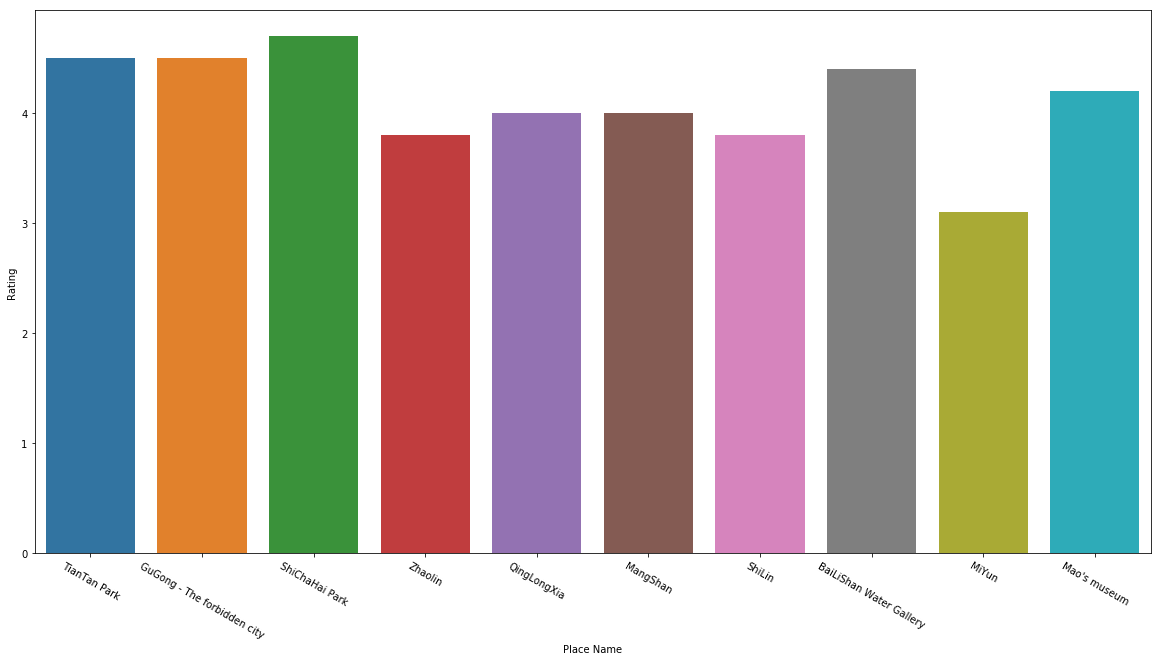

In [0]:

plt.figure(figsize=(20,10)) 
sns.barplot(x = df["Place Name"], y = df["Rating"])
plt.xticks(rotation=330)
plt.ylabel("Rating")


# Create Heat Map

In [0]:
import folium
from folium import plugins

heatMap = folium.Map(location=[39.9042, 116.4074], zoom_start = 9)
heatMap.add_child(plugins.HeatMap([[row["lat"], row["Long"]] for name, row in df.iterrows()]))

In [0]:
""

''